<a href="https://colab.research.google.com/github/pragmaerror/puc-ciencia-de-dados-e-analytics/blob/main/analise-de-dados-e-boas-praticas/exercicios/populacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading of Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#
# Parse and adjust dataset
#
population_df = pd.read_csv('https://sidra.ibge.gov.br/geratabela?format=br.csv&name=tabela1286.csv&terr=N&rank=-&query=t/1286/n2/all/v/606/p/all/l/v,p,t', on_bad_lines='skip', skiprows=3, nrows=5, delimiter=';')

# use first column as index
population_df = population_df.set_index('Grande Região')

# adjust scale (in millions)
population_df = population_df.astype(float) / 1000000

print(population_df)


                   1872      1890      1900       1920       1940       1950  \
Grande Região                                                                  
Norte          0.332847  0.476370  0.695112   1.439052   1.627608   2.048696   
Nordeste       4.638560  6.002047  6.749507  11.245921  14.434080  17.973413   
Sudeste        4.016922  6.104384  7.824011  13.654934  18.345831  22.548494   
Sul            0.721337  1.430715  1.796495   3.537167   5.735305   7.840870   
Centro-Oeste   0.220812  0.320399  0.373309   0.758531   1.093491   1.532924   

                    1960       1970       1980       1991       2000  \
Grande Região                                                          
Norte           2.930005   4.188313   6.767249  10.257266  12.893561   
Nordeste       22.428873  28.675110  35.419156  42.470225  47.693253   
Sudeste        31.062978  40.331969  52.580527  62.660700  72.297351   
Sul            11.892107  16.683551  19.380126  22.117026  25.089783   
Centro-

**Plot setup**

In [ ]:
#
# Values for plotting
#
groups = []   # years
for c in population_df.columns:
    groups.append(c)

labels = []   # columns names
values = []   # row values
for i in range(0, len(population_df.index)):
    labels.append(population_df.iloc[i].name)
    values.append(population_df.iloc[i])

**Line Plot**

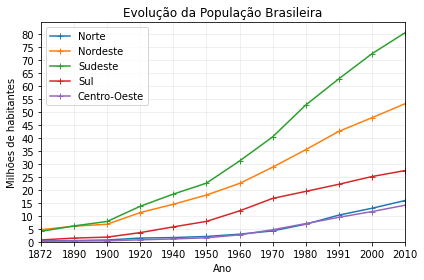

In [ ]:
#
# Line Plot
#
figure, axes = plt.subplots()

# plot labels
axes.set_title('Evolução da População Brasileira', horizontalalignment = 'center')
axes.set_ylabel('Milhões de habitantes', horizontalalignment = 'center')
axes.set_xlabel('Ano', horizontalalignment = 'center')

# add each data points from each row
for i in range(0, len(population_df.index)):
    axes.plot(population_df.columns, values[i], marker ="+", label = labels[i])
  
# x ticks, x limits
axes.set_xticks(ticks=population_df.columns, labels=population_df.columns)
plt.xlim(left = min(groups), right = max(groups))

# y ticks, y limits
y_step = 5.0
y_min = 0
y_max = max(population_df.max())   
y_max = (y_max+y_step-1)/y_step*y_step   # round up to next multiple of y_step
y_ticks = np.arange(start = y_min, stop = y_max, step = y_step)
y_ticks = y_ticks.astype(int) 
axes.set_yticks(ticks = y_ticks, labels = [y for y in y_ticks])
plt.ylim(y_min, y_max)

# legend box
plt.legend(loc="upper left")

# set grid
plt.grid(axis='both', alpha=0.25)

#
# Show plots
#
plt.tight_layout()
plt.show()

**Stacked Bar Plot**

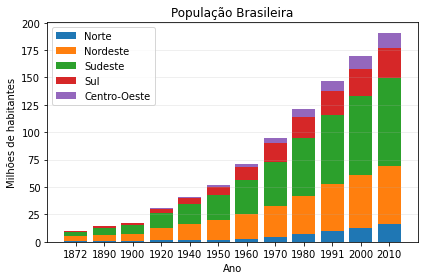

In [ ]:
#
# Stacked Bar Plot
#
figure, axes = plt.subplots()

# plot labels
axes.set_title('População Brasileira', horizontalalignment = 'center')
axes.set_ylabel('Milhões de habitantes', horizontalalignment = 'center')
axes.set_xlabel('Ano', horizontalalignment = 'center')

# add each data points from each row
for i in range(0, len(population_df.index)):
  axes.bar(groups, values[i], bottom = np.sum(values[:i], axis = 0), label = labels[i])

# legend box
plt.legend(loc="upper left")

# set grid
plt.grid(axis='y', alpha=0.25)


#
# Show plots
#
plt.tight_layout()
plt.show()